## Task1

The first step is to import wave library to read audio file and get frame bytes.

In [11]:
import wave

# read wave audio file
with wave.open("Ex3_sound1.wav", mode='rb') as wav:
    f_bytes = bytearray(list(wav.readframes(wav.getnframes())))

After that we extract bytes in Bytearray form 

In [12]:
extracted_bit = [f_bytes[i] & 1 for i in range(len(f_bytes))]

After we get our binary bits we process and parse it to extract the least significant digit and rejoin the bits 

In [13]:
secret_message = "".join(chr(int("".join(map(str,extracted_bit[i:i+8])),2)) for i in range(0,len(extracted_bit),8))
parsed_message = secret_message.split("###")[0]

In [14]:
print("Secret message is : "+parsed_message)
wav.close()

Secret message is : Mom I will not be home for supper


## Task 2

The first thing we should do is to come up with a metric that determines which sound file is likely
to contain a hidden message.

Since the hidden message is in a form of ultrasonic sound, we perform numrical analysis to determine
the average frequency. as the sound file that contains the hidden message will significantly have higher frequency rate average.

We first define two helper functions called spectral_statistics and freq_comprasion.
spectral_statistics will take audio data array and sample rate as argument and return the mean frequency.
values returned from spectral_statistics can be given as arguements to freq_comprasion which will return the index
of the file that has the highest freq mean and thus possibly the hidden message

In [26]:
def spectral_statistics(y, fs):
   
    specs = np.abs(np.fft.rfft(y))
    frequency = np.fft.rfftfreq(len(y), d=1/fs)    
    amplitude = specs / specs.sum()
    mean = (frequency * amplitude).sum()
    return mean 


def freq_comprasion(*args):
    max = 0
    index = 0
    for i in args:
        if i > max:
            max = i
            index = args.index(i)
    return "the suspicious audio file index number is: " + str(index)
            

Now we can importThinkDSP, wavfile module from scipy, np and the audio files

In [27]:
import thinkdsp
from scipy.io import wavfile
import numpy as np

sr1, data1 = wavfile.read('Ex3_sound2.wav')
sr2, data2 = wavfile.read('Ex3_sound3.wav')
sr3, data3 = wavfile.read('Ex3_sound4.wav')



We then parse the audio files to extract the data and sample rate in order to feed it to the helper functions

In [28]:
freq_comprasion(spectral_statistics(data1, sr1), spectral_statistics(data2, sr2), 
               spectral_statistics(data3, sr3))

'the suspicious audio file index number is: 2'

From this we can predict that 'Ex3_sound4.wav' is the file that contain the hidden message and now we can do further 
analysis. we can start by plotting the spectrum of that file 

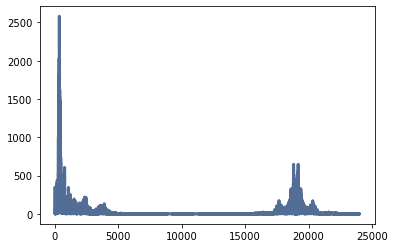

In [29]:
soundFile = thinkdsp.read_wave('Ex3_sound4.wav')
spectrum = soundFile.make_spectrum()
spectrum.plot()


As we can see there are high frequencies in the range of 17,000Hz to 22,000Hz and 

We can now make a singal carroer and then modulate the amplitude 

In [30]:
carrier_sig = thinkdsp.CosSignal(freq=19000)
carrier_wave = carrier_sig.make_wave(duration=soundFile.duration, framerate=soundFile.framerate)

In [31]:
modulatedSound = soundFile * carrier_wave

In [32]:
modulatedSound.make_audio()

After playing the audio the hidden code is 1891 however the sound has a high pitch in it we can look at the spectrum again 

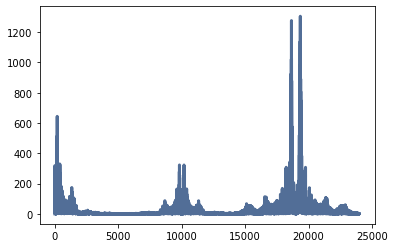

In [33]:
spectrum = modulatedSound.make_spectrum()
spectrum.plot()

We can now apply a lowpass filter to eliminate the high pitch noise in the file and set the cutoff to 5000 Hz

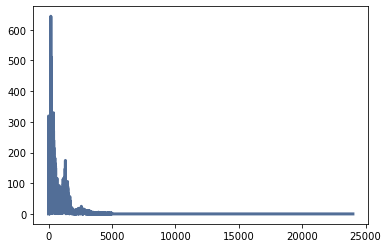

In [34]:
spectrum.low_pass(5000)
spectrum.plot()

Now we can generate a wave sound from this spectrum that is filtered and clean

In [35]:
filtered = spectrum.make_wave()
filtered.make_audio()

In [44]:
# We will use wave package available in native Python installation to read and write .wav audio file
import wave
# read wave audio file
song = wave.open("Ex3_sound5.wav", mode='rb')
# Read frames and convert to byte array
frame_bytes = bytearray(list(song.readframes(song.getnframes())))

# The "secret" text message
string='hellow world!'
# Append dummy data to fill out rest of the bytes. Receiver shall detect and remove these characters.
string = string + int((int(len(frame_bytes)/2)-(len(string)*8*8))/8) *'#'
# Convert text to bit array
bits = list(map(int, ''.join([bin(ord(i)).lstrip('0b').rjust(8,'0') for i in string])))

# Replace LSB of each byte of the audio data by one bit from the text bit array
for i in range(len(bits)):
    frame_bytes[i*2] = (frame_bytes[i] & 254) | bits[i]
# Get the modified bytes
frame_modified = bytes(frame_bytes)

# Write bytes to a new wave audio file
with wave.open('songs.wav', 'wb') as fd:
    fd.setparams(song.getparams())
    fd.writeframes(frame_modified)
song.close()


In [45]:
import wave
song = wave.open("songs.wav", mode='rb')
# Convert audio to byte array
frame_bytes = bytearray(list(song.readframes(song.getnframes())))

# Extract the LSB of each byte
extracted =  [ frame_bytes[i*2] & 1 for i in range(int(len(frame_bytes)/2))]
# Convert byte array back to string
string = "".join(chr(int("".join(map(str,extracted[i:i+8])),2)) for i in range(0,len(extracted),8))
# Cut off at the filler characters
decoded = string.split("###")[0]

# Print the extracted text
print("Sucessfully decoded: "+decoded)
song.close()

Sucessfully decoded: hellow world!
